In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, train_test_split

In [234]:
df_meas = pd.read_csv("data/IMPROVE_2015_measures_cs433.csv")
df_spec = pd.read_csv("data/IMPROVE_2015_raw_spectra_cs433.csv")
df_split = pd.read_csv("data/IMPROVE_2015_train_test_split_cs433.csv")
df_derive = pd.read_csv("data/IMPROVE_2015_2nd-derivative_spectra_cs433.csv")

### Data Exploration

In [235]:
df_meas.head()

,Unnamed: 0,site,SiteCode,Date,flag,Latitude,Longitude,ECf:Value,ECf:Unc,MF:Value,MF:Unc,OCf:Value,OCf:Unc,SO4f:Value,SO4f:Unc,NO3f:Value,NO3f:Unc,DUSTf:Value,DUSTf:Unc
0,0,CRLA1_04_21_2015_NM_0_csv,CRLA1,20150421,NM,42.8958,-122.1361,1.844414,1.023308,76.541793,2.718720,23.343977,3.196060,6.800987,0.142307,1.642580,0.095802,8.725530,0.758188
1,1,TONT1_05_09_2015_NM_0_csv,TONT1,20150509,NM,33.6548,-111.1068,0.218577,0.203142,23.273289,1.597004,3.774399,0.868154,3.132621,0.075339,2.733602,0.136727,4.686666,0.445060
2,2,BADL1_11_26_2015_NM_0_csv,BADL1,20151126,NM,43.7435,-101.9412,0.057109,0.178062,11.188888,1.473206,1.902453,0.738827,4.275544,0.113381,2.193672,0.136355,1.007311,0.121622
3,3,BRID1_10_27_2015_NM_0_csv,BRID1,20151027,NM,42.9749,-109.7579,0.090872,0.144012,6.564180,1.504830,1.569566,0.834177,0.788829,0.036832,0.556859,0.107056,0.337955,0.107560
4,4,SEQU1_04_03_2015_NM_0_csv,SEQU1,20150403,NM,36.4894,-118.8291,1.623977,0.971745,60.448977,2.306680,16.223032,2.258965,8.185925,0.169281,7.541357,0.309728,8.532945,0.735361


In [236]:
df_meas = df_meas.set_index("site")

In [237]:
df_OC = pd.DataFrame(df_meas[["OCf:Value","OCf:Unc"]]) #df_meas.loc[df_meas.flag == "NM",["OCf:Value","OCf:Unc"]] 

In [238]:
df_spec.head()

,wavenumber,ACAD1_01_06_2015_NM_0_csv,ACAD1_01_09_2015_NM_0_csv,ACAD1_01_12_2015_NM_0_csv,ACAD1_01_15_2015_NM_0_csv,ACAD1_01_18_2015_NM_0_csv,ACAD1_01_21_2015_NM_0_csv,ACAD1_01_24_2015_NM_0_csv,ACAD1_01_27_2015_NM_0_csv,ACAD1_01_30_2015_NM_0_csv,...,YOSE1_07_02_2015_FB_0_csv,YOSEX_01_15_2015_FB_0_csv,YOSEX_02_05_2015_FB_0_csv,YOSEX_05_21_2015_FB_0_csv,YOSEX_06_11_2015_FB_0_csv,YOSEX_09_03_2015_FB_0_csv,YOSEX_10_15_2015_FB_0_csv,YOSEX_11_05_2015_FB_0_csv,ZICA1_08_13_2015_FB_0_csv,ZICA1_09_03_2015_FB_0_csv
0,3998.423206,0.35778,0.58858,0.55091,0.49739,0.46597,0.42318,0.41571,0.34475,0.62313,...,0.24296,0.29209,0.40211,0.63614,0.54269,0.67122,0.53922,0.64828,0.40594,0.52207
1,3997.137539,0.35760,0.58832,0.55055,0.49715,0.46570,0.42296,0.41546,0.34452,0.62289,...,0.24282,0.29193,0.40188,0.63588,0.54250,0.67098,0.53898,0.64796,0.40579,0.52184
2,3995.851872,0.35743,0.58806,0.55019,0.49690,0.46543,0.42273,0.41520,0.34430,0.62265,...,0.24269,0.29177,0.40166,0.63563,0.54231,0.67074,0.53873,0.64762,0.40565,0.52161
3,3994.566206,0.35725,0.58781,0.54984,0.49665,0.46516,0.42250,0.41493,0.34407,0.62240,...,0.24255,0.29161,0.40143,0.63538,0.54213,0.67051,0.53848,0.64729,0.40550,0.52138
4,3993.280539,0.35708,0.58756,0.54948,0.49640,0.46489,0.42227,0.41466,0.34384,0.62215,...,0.24241,0.29145,0.40120,0.63512,0.54196,0.67027,0.53823,0.64696,0.40535,0.52114


### Data Processing

In [239]:
df_spec = df_spec.T

In [240]:
df_spec.head()

,0,1,2,3,4,5,6,7,8,9,...,2774,2775,2776,2777,2778,2779,2780,2781,2782,2783
wavenumber,3998.423206,3997.137539,3995.851872,3994.566206,3993.280539,3991.994872,3990.709206,3989.423539,3988.137873,3986.852206,...,431.983986,430.698320,429.412653,428.126986,426.841320,425.555653,424.269986,422.984320,421.698653,420.412987
ACAD1_01_06_2015_NM_0_csv,0.357780,0.357600,0.357430,0.357250,0.357080,0.356890,0.356710,0.356520,0.356340,0.356150,...,-0.074765,-0.074292,-0.073728,-0.073047,-0.072208,-0.071185,-0.069949,-0.068499,-0.066864,-0.065079
ACAD1_01_09_2015_NM_0_csv,0.588580,0.588320,0.588060,0.587810,0.587560,0.587310,0.587070,0.586820,0.586570,0.586320,...,-0.099660,-0.099046,-0.098279,-0.097314,-0.096101,-0.094638,-0.092941,-0.091018,-0.088871,-0.086477
ACAD1_01_12_2015_NM_0_csv,0.550910,0.550550,0.550190,0.549840,0.549480,0.549120,0.548750,0.548380,0.548010,0.547640,...,-0.095560,-0.095277,-0.094907,-0.094408,-0.093729,-0.092851,-0.091786,-0.090555,-0.089180,-0.087647
ACAD1_01_15_2015_NM_0_csv,0.497390,0.497150,0.496900,0.496650,0.496400,0.496150,0.495900,0.495640,0.495390,0.495150,...,-0.105530,-0.105590,-0.105570,-0.105420,-0.105160,-0.104810,-0.104370,-0.103790,-0.103030,-0.102080


In [241]:
pd_merge = df_OC.merge(df_spec, right_index=True, left_index=True)

In [242]:
df_split = df_split.set_index("site", drop=True).drop(["Unnamed: 0"], axis=1)

In [243]:
pd_merge_again = pd_merge.merge(df_split, right_index=True, left_index=True)

In [244]:
pd_merge_again["OCf:Value"]

CRLA1_04_21_2015_NM_0_csv       23.343977
TONT1_05_09_2015_NM_0_csv        3.774399
BADL1_11_26_2015_NM_0_csv        1.902453
BRID1_10_27_2015_NM_0_csv        1.569566
SEQU1_04_03_2015_NM_0_csv       16.223032
PINN1_08_04_2015_NM_QC_0_csv     1.969049
PINN1_08_04_2015_NM_0_csv        1.969049
BRIS1_12_17_2015_NM_0_csv        9.704800
BRCA1_04_15_2015_NM_0_csv        1.304018
WHIT1_12_14_2015_NM_0_csv        1.178174
DOME1_08_31_2015_NM_0_csv       24.109274
GLAC1_04_09_2015_NM_0_csv        7.833412
LOST1_03_07_2015_NM_0_csv        3.838577
MAKA2_03_31_2015_NM_0_csv        0.127425
ELLI1_08_13_2015_NM_2_0_csv     16.295581
BADL1_10_09_2015_NM_0_csv       21.264523
MOZI1_04_15_2015_NM_0_csv        1.834183
IKBA1_01_06_2015_NM_0_csv        4.680329
SHEN1_02_08_2015_NM_0_csv       16.457420
PHOE5_11_23_2015_NM_0_csv       35.038568
MORA1_04_21_2015_NM_0_csv        8.615637
BYIS1_08_07_2015_NM_0_csv        1.922358
SIPS1_08_01_2015_NM_0_csv       13.305918
NOCA1_10_06_2015_NM_0_csv       16

In [245]:
set_train = pd_merge_again[pd_merge_again["usage"] == "calibration"]

In [246]:
set_test = pd_merge_again[pd_merge_again["usage"] == "test"]

In [247]:
df_OCU_tr = set_train["OCf:Unc"]
df_OCU_te = set_test["OCf:Unc"]

In [248]:
y_tr = set_train["OCf:Value"]
y_te = set_test["OCf:Value"]
x_tr = set_train.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te = set_test.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

### LinearRegression

In [249]:
lr = LinearRegression()

In [250]:
cross_val_score(lr, x_tr, y_tr, cv=10)

array([0.9499418 , 0.96999377, 0.98672424, 0.97018351, 0.97540869,
       0.98525754, 0.98151849, 0.98565859, 0.99181818, 0.97690972])

In [251]:
lr.fit(x_tr,y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
y_pred_tr = lr.predict(x_tr)
y_pred_te = lr.predict(x_te)

Text(0,0.5,'Predicted y')

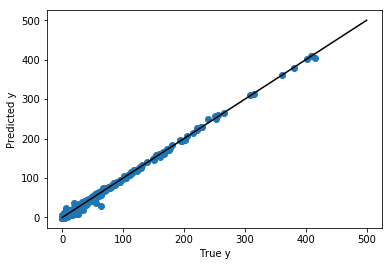

In [253]:
plt.scatter(y_tr,y_pred_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [254]:
r2_score(y_tr,y_pred_tr)

0.9938067608611515

In [255]:
bias_tr = (y_tr - y_pred_tr) / df_OCU_tr
#bias_te = (y_te - y_pred_te) / df_OCU_te

In [256]:
SNR_tr = y_tr / df_OCU_tr
#SNR_te = y_te / df_OCU_te

Text(0,0.5,'bias')

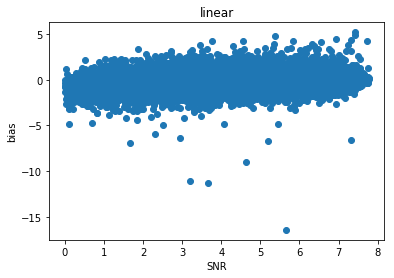

In [257]:
plt.scatter(SNR_tr,bias_tr)
plt.title("linear")
plt.xlabel("SNR")
plt.ylabel("bias")

### Ridge regression

In [150]:
ridge = Ridge()

In [151]:
cross_val_score(ridge,x_tr,y_tr, cv=10)

array([0.95377443, 0.96659408, 0.98123803, 0.9557097 , 0.96215155,
       0.97658692, 0.97252635, 0.9814716 , 0.9707717 , 0.96947386])

In [204]:
ridge.fit(x_tr,y_tr)
y_pred_tr_ridge = ridge.predict(x_tr)
#y_pred_te_ridge = ridge.predict(x_te)

Text(0,0.5,'Predicted y')

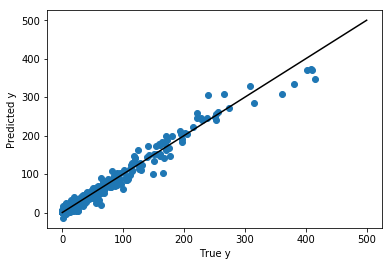

In [206]:
plt.scatter(y_tr,y_pred_tr_ridge)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")


In [155]:
r2_score(y_tr,y_pred_tr_ridge)

0.9754435219744614

Text(0,0.5,'bias')

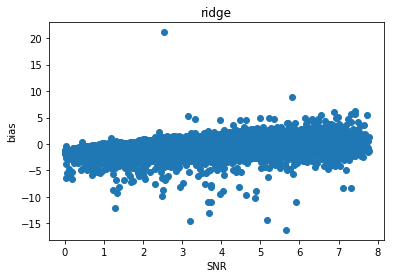

In [157]:
bias_tr_ridge = (y_tr - y_pred_tr_ridge) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_ridge)
plt.title("ridge")
plt.xlabel("SNR")
plt.ylabel("bias")

### Neural Network

In [191]:
nn = MLPRegressor()

In [192]:
nn.fit(x_tr,y_tr)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [193]:
y_pred_tr_nn = nn.predict(x_tr)

Text(0,0.5,'Predicted y')

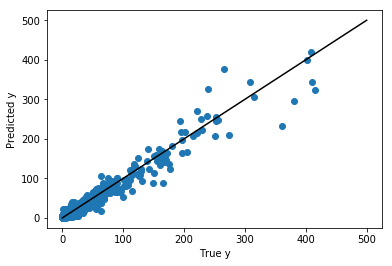

In [194]:
plt.scatter(y_tr,y_pred_tr_nn)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [195]:
r2_score(y_tr,y_pred_tr_nn)

0.9467001597132008

Text(0,0.5,'bias')

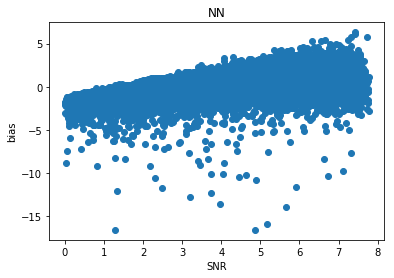

In [211]:
bias_tr_nn = (y_tr - y_pred_tr_nn) / df_OCU_tr

plt.scatter(SNR_tr,bias_tr_nn)
plt.title("NN")
plt.xlabel("SNR")
plt.ylabel("bias")

### 2nd derivative

In [163]:
df_derive = df_derive.T

In [165]:
pd_der_merge = df_OC.merge(df_derive, right_index=True, left_index=True)

In [167]:
df_split.head(9)

,Unnamed: 0,site,usage
0,0,CRLA1_04_21_2015_NM_0_csv,calibration
1,1,TONT1_05_09_2015_NM_0_csv,calibration
2,2,BADL1_11_26_2015_NM_0_csv,calibration
3,3,BRID1_10_27_2015_NM_0_csv,calibration
4,4,SEQU1_04_03_2015_NM_0_csv,calibration
5,5,PINN1_08_04_2015_NM_QC_0_csv,calibration
6,6,BRIS1_12_17_2015_NM_0_csv,calibration
7,7,BRCA1_04_15_2015_NM_0_csv,calibration
8,8,ORPI1_09_03_2015_FB_0_csv,calibration


In [171]:
pd_der_again = pd_der_merge.merge(df_split, right_index=True, left_index=True)

In [172]:
set_train_der = pd_der_again[pd_der_again["usage"] == "calibration"]

In [173]:
set_test_der = pd_der_again[pd_der_again["usage"] == "test"]

In [174]:
y_tr_der = set_train_der["OCf:Value"]
y_te_der = set_test_der["OCf:Value"]
x_tr_der = set_train_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)
x_te_der = set_test_der.drop(["OCf:Value","OCf:Unc","usage"], axis=1)

In [175]:
lr.fit(x_tr_der,y_tr_der)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [177]:
der_predict_tr = lr.predict(x_tr_der)

Text(0,0.5,'Predicted y')

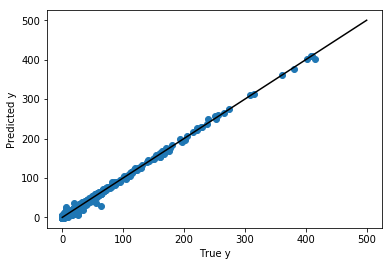

In [178]:
plt.scatter(y_tr,der_predict_tr)
u = np.linspace(0,500)
plt.plot(u,u, c='black')
plt.xlabel("True y")
plt.ylabel("Predicted y")

In [179]:
r2_score(y_tr,der_predict_tr)

0.9938977307958035

In [186]:
x_tr_der[x_tr_der.index.contains("_NM_")]

CRLA1_04_21_2015_NM_0_csv      -1.664240e-07
TONT1_05_09_2015_NM_0_csv      -2.567684e-07
BADL1_11_26_2015_NM_0_csv      -3.991203e-07
BRID1_10_27_2015_NM_0_csv       4.606378e-08
SEQU1_04_03_2015_NM_0_csv       9.093881e-08
PINN1_08_04_2015_NM_QC_0_csv   -6.154715e-07
BRIS1_12_17_2015_NM_0_csv      -3.292817e-07
BRCA1_04_15_2015_NM_0_csv       9.093881e-08
WHIT1_12_14_2015_NM_0_csv      -8.321198e-09
DOME1_08_31_2015_NM_0_csv       1.444322e-07
GLAC1_04_09_2015_NM_0_csv       3.661327e-07
LOST1_03_07_2015_NM_0_csv      -3.209605e-07
MAKA2_03_31_2015_NM_0_csv      -4.763886e-07
ELLI1_08_13_2015_NM_2_0_csv    -2.169455e-08
BADL1_10_09_2015_NM_0_csv      -1.845523e-07
MOZI1_04_15_2015_NM_0_csv       9.331629e-08
IKBA1_01_06_2015_NM_0_csv      -4.332967e-07
SHEN1_02_08_2015_NM_0_csv      -1.393801e-07
PHOE5_11_23_2015_NM_0_csv      -2.835151e-07
MORA1_04_21_2015_NM_0_csv      -1.227377e-07
BYIS1_08_07_2015_NM_0_csv      -3.269042e-07
SIPS1_08_01_2015_NM_0_csv      -4.009034e-07
NOCA1_10_0